データ解析のための統計モデリングの２章

In [2]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import mstats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pystan
import arviz

In [19]:
data = pd.DataFrame( [2,2,4,6,4,5,2,3,1,2,
                      0,4,3,3,3,3,4,2,7,2,
                      4,3,3,3,4,3,7,5,3,1,
                      7,6,4,6,5,2,4,7,2,2,
                      6,2,4,5,4,5,1,3,2,3],
                      columns=["numOfSeed"])

data.head(10)

,numOfSeed
0,2
1,2
2,4
3,6
4,4
5,5
6,2
7,3
8,1
9,2


In [4]:
data.describe()

,numOfSeed
count,50.00000
mean,3.56000
std,1.72804
min,0.00000
25%,2.00000
50%,3.00000
75%,4.75000
max,7.00000


In [5]:
data.value_counts(sort=False)

numOfSeed
0             1
1             3
2            11
3            12
4            10
5             5
6             4
7             4
dtype: int64

array([[<AxesSubplot:title={'center':'numOfSeed'}>]], dtype=object)

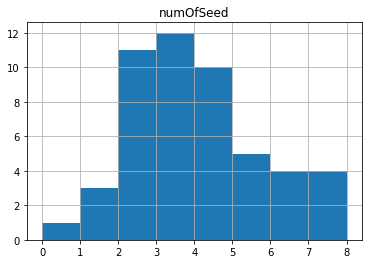

In [6]:
data.hist(bins=range(9),  )

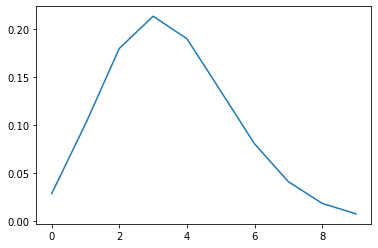

In [7]:
x = np.arange(0, 10, 1)
lambda_num = 3.56
y = scipy.stats.poisson.pmf(x, lambda_num)

plt.plot(x, y)

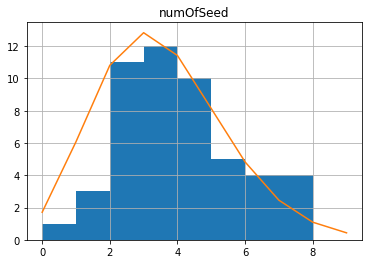

In [9]:
data.hist(bins=range(9),  )
plt.plot(x, y*60)

最尤推定ではなくMCMCでパラメータLambdaの推定を行う

In [12]:
stan_model="""
data {
    // 今回入力されるデータは得られた種子数(Target)のみでXは存在しない
    int  N;
    int Y[N]; // 観測された種子数はintしかありえない(小数はない)
}

parameters {
    real<lower=0> lambda; //今回推定したいパラメータ
}

model {
    for (n in 1:N) {
        Y[n] ~ poisson(lambda);
    }
}
"""

In [13]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9bad81217c34012aeb69416397d12237 NOW.


In [17]:
stan_data = {
    "N": data.shape[0],
    "Y": data["numOfSeed"]
}

fit = sm.sampling(data=stan_data, iter=1000, warmup=300, chains=3, seed=0)
print(fit)

Inference for Stan model: anon_model_9bad81217c34012aeb69416397d12237.
3 chains, each with iter=1000; warmup=300; thin=1; 
post-warmup draws per chain=700, total post-warmup draws=2100.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   3.57    0.01   0.27   3.02   3.38   3.57   3.74   4.11    732    1.0
lp__    48.76    0.03   0.78  46.65  48.59  49.06  49.24  49.29    928    1.0

Samples were drawn using NUTS at Thu Jan 27 14:56:19 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


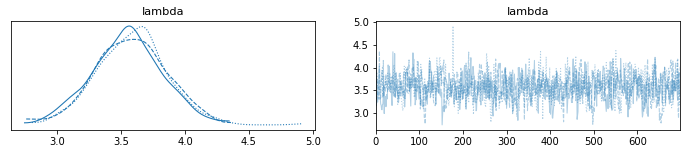

In [18]:
fig = arviz.plot_trace(fit)

lambdaのRhatは1.0でOK

以上より、MCMCから　Lambdaの値は3.57であると推定される